In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
RANDOM_SEED = 2004

# Задание 1

In [12]:
def step_function(x):
    return np.where(x >= 0, 1, 0)

def neuron_predict(X, w, b, activation):
    z = np.dot(X, w) + b
    return activation(z)

In [6]:
np.random.seed(RANDOM_SEED)
X_class0 = np.random.randn(50, 2) + np.array([-2, -2])
X_class1 = np.random.randn(50, 2) + np.array([2, 2])

X = np.vstack((X_class0, X_class1))
y = np.array([0]*50 + [1]*50)

In [23]:
w = np.array([1.0, 1.0])
b = 0.0

y_pred = neuron_predict(X, w, b, step_function)

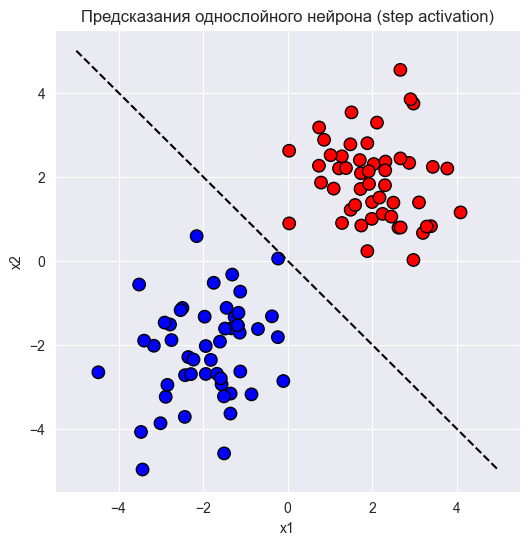

In [8]:
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y_pred, cmap='bwr', edgecolor='k', s=80)
plt.title("Предсказания однослойного нейрона (step activation)")
plt.xlabel("x1")
plt.ylabel("x2")

x_line = np.linspace(-5, 5, 100)
y_line = -(w[0]*x_line + b) / w[1]
plt.plot(x_line, y_line, 'k--')
plt.grid(True)
plt.show()

# Задание 2

In [24]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def f_arctg(x):
    return np.arctan(x)

In [25]:
y_step = neuron_predict(X, w, b, step_function)
y_sigmoid = neuron_predict(X, w, b, sigmoid)
y_relu = neuron_predict(X, w, b, relu)
y_arctg = neuron_predict(X, w, b, f_arctg)

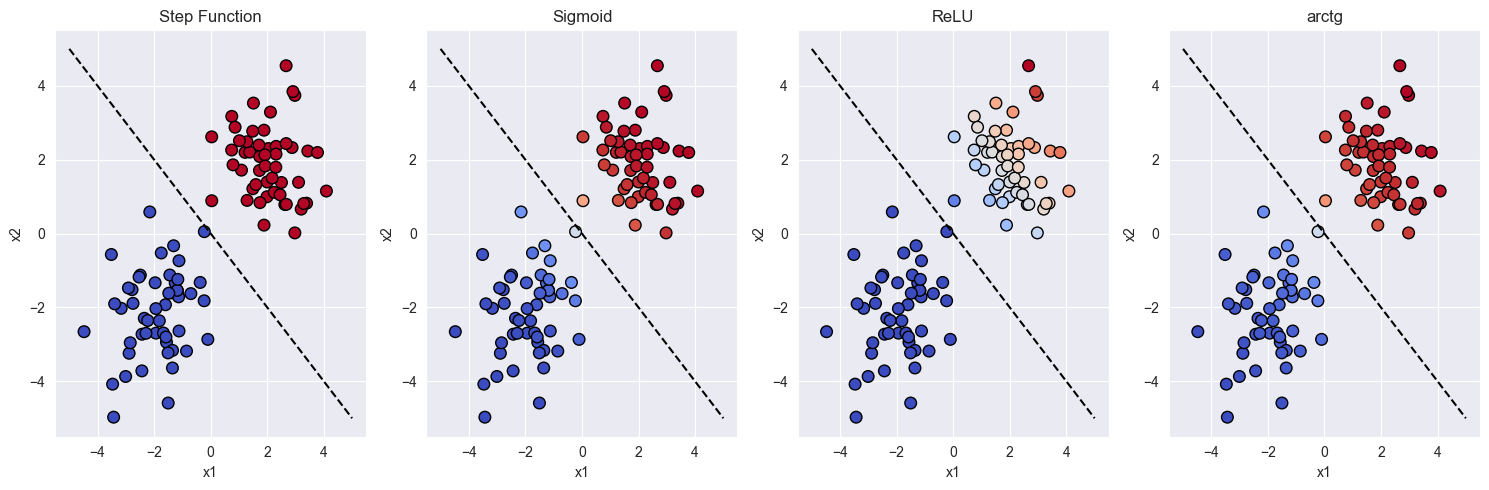

In [29]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

titles = ['Step Function', 'Sigmoid', 'ReLU', "arctg"]
predictions = [y_step, y_sigmoid, y_relu, y_arctg]
activations = [step_function, sigmoid, relu, f_arctg]

for i, (title, pred, act_func) in enumerate(zip(titles, predictions, activations)):
    sc = ax[i].scatter(X[:, 0], X[:, 1], c=pred, cmap='coolwarm', s=70, edgecolor='k')
    ax[i].set_title(title)
    ax[i].set_xlabel('x1')
    ax[i].set_ylabel('x2')
    ax[i].grid(True)

    # Линия раздела: w1*x1 + w2*x2 + b = 0
    x_line = np.linspace(-5, 5, 100)
    y_line = -(w[0]*x_line + b) / w[1]
    ax[i].plot(x_line, y_line, 'k--')

plt.tight_layout()
plt.show()

## Step Function
1) Имеем жёсткую линейную границу между классами
2) Дифференцировать нельзя, значит обучение градиентом невозможно
3) Применимо только для линейно разделимых данных

## Sigmoid
1) Более мягка граница между классами, нежели у Step Function
2) Позволяет обучаться с помощью градиентного спуска
3) При больших |x| градиент затухает (эффект насыщения)

## ReLU
1) “умирание” нейронов при отрицательных входах (вес перестаёт обновляться)
2) Высокая скорость обучения, нет насыщения при больших x
3) ReLU делает поведение нейрона линейным только с одной стороны

## Arctg
1) Более устойчива к выбросам по сравнению с ReLU и Sigmoid
2) Дифференцируема на всей оси

# Задание 3

## Вопросы
1. Что делает функция активации в искусственном нейроне?
2. Чем отличается искусственный нейрон от однослойного перцептрона?
3. Какое правило используется для обучения перцептрона?
4. Почему однослойный перцептрон не может решить задачу XOR?
5. Что произойдет, если изменить функцию активации с сигмоиды на ReLU?

## Ответы
1) Она преобразует взвешенную сумму входных сигналов в выходное значение, добавляя нелинейность в модель
2) Искусственный нейрон — это один элемент, выполняющий вычисление
Однослойный перцептрон — это модель, состоящая из нескольких искусственных нейронов, объединённых в один слой и работающих параллельно для классификации объектов
3) Используется правило обучения Розенблатта:

$$w_i^{(нов)} = w_i^{(стар)} + \eta (y_{истинное} - y_{предсказанное}) x_i$$

где:
- $\eta$ — скорость обучения,
- $y_{истинное}$ — правильный ответ,
- $y_{предсказанное}$ — выход модели.

4) Однослойный перцептрон проводит только одну линейную границу, а для решения XOR нужны нелинейные комбинации признаков, что возможно только в многослойных нейросетях
5) Модель станет обучаться быстрее, так как ReLU не насыщается при больших значениях входа. Исезнет эффект “затухающего градиента”, который часто возникает у сигмоиды. Однако нейроны, получающие отрицательные входы, перестанут активироваться.